# Pittsburgh Sports Winning

This projects evaluates the winning percentages of Pittsburgh sports teams since 1967. It knits together datasets and cleans data. It uses the seaborn package to display the findings. This project was created as part of the University of Michigan Applied Data Science program. 


Datasets were simply pulled from Wikipedia without prior cleaning. All manipulation is displayed below. For example: https://en.wikipedia.org/wiki/List_of_Pittsburgh_Steelers_seasons

In [41]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import seaborn as sns

%matplotlib notebook

In [2]:
#Bringing in datasets 
pirates_df = pd.read_csv('Pittsburgh Pirates - All Time - Sheet1.csv')
steelers_df = pd.read_csv('Pittsburgh Steelers - All Time - Sheet1.csv')
penguins_df = pd.read_csv('Pittsburgh Penguins - All Time - Sheet1.csv')

In [3]:
#Clean up each sheet

#Pirates first 
pirates_df.head(15)

,MLB season,Team season,League,Division,Finish,Wins,Losses,Win%,GB,Post-season,Awards[7]
0,*Pittsburgh Alleghenys*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1882[6],1882,AA,NaN,4th,39,39,0.5,15,NaN,NaN
2,1883,1883,AA,NaN,7th,31,67,0.316,35,NaN,NaN
3,1884,1884,AA,NaN,11th,30,78,0.278,45½,NaN,NaN
4,1885,1885,AA,NaN,3rd,56,55,0.505,22½,NaN,NaN
5,1886,1886,AA,NaN,2nd,80,57,0.584,12,NaN,NaN
6,1887,1887,NL,NaN,6th,55,69,0.444,24,NaN,NaN
7,1888,1888,NL,NaN,6th,66,68,0.493,19½,NaN,NaN
8,1889,1889,NL,NaN,5th,61,71,0.462,25,NaN,NaN
9,1890,1890[n],NL,NaN,8th,23,113,0.169,66½,NaN,NaN


In [4]:
#remove team name changes and strip out brackets 
pirates_df = pirates_df.drop(0)

In [5]:
pirates_df = pirates_df.drop(10)

In [6]:
pirates_df = pirates_df.drop(pirates_df.tail(6).index) 

In [7]:
pirates_df.tail(10)

,MLB season,Team season,League,Division,Finish,Wins,Losses,Win%,GB,Post-season,Awards[7]
133,2012,2012,NL,Central,4th,79,83,0.488,18,NaN,NaN
134,2013,2013,NL,Central,2nd ¤,94,68,0.58,3,Won NLWC (Reds) \nLost NLDS (Cardinals) 3–2,Andrew McCutchen (MVP)\nClint Hurdle (MOY)\nFr...
135,2014,2014,NL,Central,2nd ¤,88,74,0.543,2,Lost NLWC (Giants),NaN
136,2015,2015,NL,Central,2nd ¤,98,64,0.605,2,Lost NLWC (Cubs),NaN
137,2016,2016,NL,Central,3rd,78,83,0.484,25,NaN,NaN
138,2017,2017,NL,Central,4th,75,87,0.463,17,NaN,NaN
139,2018,2018,NL,Central,4th,82,79,0.509,12½,NaN,NaN
140,2019,2019,NL,Central,5th,69,93,0.426,22,NaN,NaN
141,2020,2020[t],NL,Central,5th,19,41,0.317,15,NaN,NaN
142,2021,2021,NL,Central,5th,61,101,0.377,34,NaN,NaN


In [8]:
list(pirates_df)

['MLB\nseason',
 'Team\nseason',
 'League',
 'Division',
 'Finish',
 'Wins',
 'Losses',
 'Win%',
 'GB',
 'Post-season',
 'Awards[7]']

In [9]:
pirates_df = pirates_df.rename(columns={'Team\nseason':'year'})

In [10]:
#strip the brackets from year 

pirates_df['year'] = (pirates_df['year'].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float))


In [11]:
pirates_df.head()

,MLB season,year,League,Division,Finish,Wins,Losses,Win%,GB,Post-season,Awards[7]
1,1882[6],1882.0,AA,NaN,4th,39,39,0.5,15,NaN,NaN
2,1883,1883.0,AA,NaN,7th,31,67,0.316,35,NaN,NaN
3,1884,1884.0,AA,NaN,11th,30,78,0.278,45½,NaN,NaN
4,1885,1885.0,AA,NaN,3rd,56,55,0.505,22½,NaN,NaN
5,1886,1886.0,AA,NaN,2nd,80,57,0.584,12,NaN,NaN


In [12]:
pirates_df['Win%'] = pirates_df['Win%'].astype(float)

In [13]:
pirates_df['name'] = 'Pirates'

In [14]:
pirates_df = pirates_df[['year', 'Win%', 'name']]

In [15]:
pirates_df.head()

,year,Win%,name
1,1882.0,0.500,Pirates
2,1883.0,0.316,Pirates
3,1884.0,0.278,Pirates
4,1885.0,0.505,Pirates
5,1886.0,0.584,Pirates


In [16]:
#Penguins second

penguins_df.head()

,Season,Penguins season,Conference,Division,Regular season[4],Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Postseason[5],Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,Finish,GP,W,L,T[6],OT[7],Pts,GF,GA,GP,W,L,GF,GA,Result
1,1967–68,1967–68,—,West,5th,74,27,34,13,—,67,195,216,—,—,—,—,—,Did not qualify
2,1968–69,1968–69,—,West,5th,76,20,45,11,—,51,189,252,—,—,—,—,—,Did not qualify
3,1969–70,1969–70,—,West,2nd,76,26,38,12,—,64,182,238,10,6,4,23,25,"Won in Quarterfinals, 4–0 (Seals)\nLost in Sem..."
4,1970–71,1970–71,—,West,6th,78,21,37,20,—,62,221,240,—,—,—,—,—,Did not qualify


In [17]:
list(penguins_df) 

['Season',
 'Penguins season',
 'Conference',
 'Division',
 'Regular season[4]',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Postseason[5]',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [18]:
penguins_df = penguins_df.rename(columns={'Penguins season':'year', 'Unnamed: 6': 'Wins', 'Unnamed: 7':'Losses'}) 

In [19]:
penguins_df = penguins_df.drop(0)

In [20]:
penguins_df = penguins_df.drop(penguins_df.tail(1).index) 

In [21]:
penguins_df['year'] = penguins_df['year'].str[:4] 

In [22]:
penguins_df['year'] = penguins_df['year'].astype(float)

In [23]:
penguins_df['Wins'] = penguins_df['Wins'].astype(float)

In [24]:
penguins_df['Losses'] = penguins_df['Losses'].astype(float)

In [25]:
penguins_df['Win%'] = penguins_df['Wins'] / (penguins_df['Wins'] + penguins_df['Losses'])

In [26]:
penguins_df['name'] = 'Penguins'

In [27]:
penguins_df = penguins_df[['year', 'Win%', 'name']]

In [28]:
penguins_df.head()

,year,Win%,name
1,1967.0,0.442623,Penguins
2,1968.0,0.307692,Penguins
3,1969.0,0.406250,Penguins
4,1970.0,0.362069,Penguins
5,1971.0,0.406250,Penguins


In [29]:
#Steelers third

steelers_df.head()

,Season,Team,League,Conference,Division,Regular season,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Postseason results,Awards,Head coaches
0,NaN,NaN,NaN,NaN,NaN,Finish,W,L,T,Pct[1],NaN,NaN,NaN
1,*Pittsburgh Pirates*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1933,1933.0,NFL,NaN,East,5th,3,6,2,0.364,NaN,NaN,Forrest Douds
3,1934,1934.0,NFL,NaN,East,5th,2,10,0,0.167,NaN,NaN,Luby DiMeolo
4,1935,1935.0,NFL,NaN,East,3rd,4,8,0,0.333,NaN,NaN,Joe Bach


In [30]:
list(steelers_df)

['Season',
 'Team',
 'League',
 'Conference',
 'Division',
 'Regular season',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Postseason results',
 'Awards',
 'Head coaches']

In [31]:
steelers_df = steelers_df.rename(columns={'Team':'year', 'Unnamed: 6': 'Wins', 'Unnamed: 7':'Losses', 'Unnamed: 8': 'Ties', 'Unnamed: 9':'Win%'})  

In [32]:
steelers_df = steelers_df.drop(0)

In [33]:
#Remove name changes 

steelers_df = steelers_df.drop(1)
steelers_df = steelers_df.drop(9)
steelers_df = steelers_df.drop(13)
steelers_df = steelers_df.drop(15)
steelers_df = steelers_df.drop(17)

In [34]:
steelers_df = steelers_df.drop(steelers_df.tail(3).index) 

In [35]:
steelers_df['name'] = 'Steelers'

In [36]:
steelers_df = steelers_df[['year', 'Win%', 'name']]

In [37]:
steelers_df.head()

,year,Win%,name
2,1933.0,0.364,Steelers
3,1934.0,0.167,Steelers
4,1935.0,0.333,Steelers
5,1936.0,0.5,Steelers
6,1937.0,0.364,Steelers


In [38]:
#Part 2 - plotting

#using only information since 1967 - the earliest common denominator amongs the teams

pirates_df = pirates_df.tail(56)
penguins_df = penguins_df.tail(55)
steelers_df = steelers_df.tail(55)

In [39]:
#Merge the data sets

half_merge = pd.merge(pirates_df, penguins_df, how = 'outer')
merged = pd.merge(half_merge, steelers_df, how = 'outer')

<IPython.core.display.Javascript object>


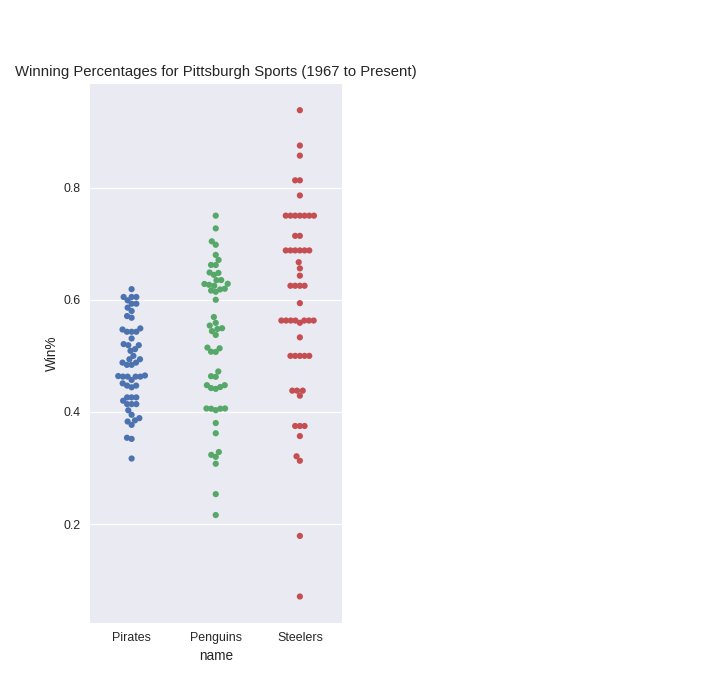

In [46]:
#plot the data with seaborn 
plt.figure()
plt.subplot(121)
sns.swarmplot('name', 'Win%', data=merged)
plt.title('Winning Percentages for Pittsburgh Sports (1967 to Present)')